## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import itertools
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MAJOR PROJECT/covid_19_data.csv")

In [ ]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89935 entries, 0 to 89934
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              89935 non-null  int64  
 1   ObservationDate  89935 non-null  object 
 2   Province/State   60575 non-null  object 
 3   Country/Region   89935 non-null  object 
 4   Last Update      89935 non-null  object 
 5   Confirmed        89934 non-null  float64
 6   Deaths           89934 non-null  float64
 7   Recovered        89934 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.5+ MB


In [ ]:
data['Last Update'] = pd.to_datetime(data['Last Update'])
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89935 entries, 0 to 89934
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              89935 non-null  int64         
 1   ObservationDate  89935 non-null  datetime64[ns]
 2   Province/State   60575 non-null  object        
 3   Country/Region   89935 non-null  object        
 4   Last Update      89935 non-null  datetime64[ns]
 5   Confirmed        89934 non-null  float64       
 6   Deaths           89934 non-null  float64       
 7   Recovered        89934 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 5.5+ MB


In [ ]:
data.isna().sum()

SNo                    0
ObservationDate        0
Province/State     29360
Country/Region         0
Last Update            0
Confirmed              1
Deaths                 1
Recovered              1
dtype: int64

In [ ]:
data.shape

(89935, 8)

In [ ]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,89935.000000,89934.000000,89934.000000,8.993400e+04
mean,44968.000000,13698.999522,647.944704,7.110826e+03
std,25962.142567,41639.611989,2642.353913,4.043782e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,22484.500000,148.000000,2.000000,1.000000e+00
50%,44968.000000,1360.000000,25.000000,2.130000e+02
75%,67451.500000,7206.000000,230.000000,2.370000e+03
max,89935.000000,699493.000000,42072.000000,1.865580e+06


In [ ]:
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
data.corr()

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.180027,0.089229,0.124640
Confirmed,0.180027,1.000000,0.737820,0.376351
Deaths,0.089229,0.737820,1.000000,0.218559
Recovered,0.124640,0.376351,0.218559,1.000000


In [ ]:
print("All over the world the total number of recorded...")
print("Positive cases are:", data['Confirmed'].sum())
print("Death cases are:", data['Deaths'].sum())
print("Recovered cases are:", data['Recovered'].sum())

All over the world the total number of recorded...
Positive cases are: 1232005823.0
Death cases are: 58272259.0
Recovered cases are: 639505021.0


In [ ]:
print("All over the world the total number of recorded...")
print("Positive cases are:", data['Confirmed'].max())
print("Death cases are:", data['Deaths'].max())
print("Recovered cases are:", data['Recovered'].max())

All over the world the total number of recorded...
Positive cases are: 699493.0
Death cases are: 42072.0
Recovered cases are: 1865580.0


## Getting India data

In [ ]:
indiaData = data[data['Country/Region'].isin(['India'])]
indiaData.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
446,447,2020-01-30,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
509,510,2020-01-31,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
567,568,2020-02-01,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
629,630,2020-02-02,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
696,697,2020-02-03,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [ ]:
print("All over India the total number of recorded...")
print("Positive cases are:", indiaData['Confirmed'].sum())
print("Death cases are:", indiaData['Deaths'].sum())
print("Recovered cases are:", indiaData['Recovered'].sum())

All over India the total number of recorded...
Positive cases are: 84186743.0
Death cases are: 1994209.0
Recovered cases are: 53552137.0


In [ ]:
indiaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 446 to 89910
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              2629 non-null   int64         
 1   ObservationDate  2629 non-null   datetime64[ns]
 2   Province/State   2497 non-null   object        
 3   Country/Region   2629 non-null   object        
 4   Last Update      2629 non-null   datetime64[ns]
 5   Confirmed        2629 non-null   float64       
 6   Deaths           2629 non-null   float64       
 7   Recovered        2629 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 184.9+ KB


In [ ]:
indiaData.isna().sum()

SNo                  0
ObservationDate      0
Province/State     132
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [ ]:
india_null_province = pd.isnull(indiaData['Province/State']) 

In [ ]:
indiaData[india_null_province]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
446,447,2020-01-30,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
509,510,2020-01-31,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
567,568,2020-02-01,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
629,630,2020-02-02,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
696,697,2020-02-03,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
35701,35702,2020-06-05,NaN,India,2021-04-02 15:13:53,236184.0,6649.0,113233.0
36389,36390,2020-06-06,NaN,India,2021-04-02 15:13:53,246622.0,6946.0,118695.0
37077,37078,2020-06-07,NaN,India,2021-04-02 15:13:53,257486.0,7207.0,123848.0
37765,37766,2020-06-08,NaN,India,2021-04-02 15:13:53,265928.0,7473.0,129095.0


In [ ]:
india_data = indiaData.dropna()

In [ ]:
india_data.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [ ]:
india_data['Confirmed']

39260       33.0
39261     5070.0
39277       57.0
39278     2937.0
39300     5459.0
          ...   
89819     3394.0
89862    62294.0
89896     8029.0
89900    32696.0
89910    62630.0
Name: Confirmed, Length: 2497, dtype: float64

In [ ]:
confirmed_data = india_data.groupby('ObservationDate').sum()['Confirmed']
cdf = confirmed_data.sort_values()
cdf

ObservationDate
2020-06-10     276583.0
2020-06-11     297535.0
2020-06-12     297535.0
2020-06-13     308993.0
2020-06-14     320922.0
                ...    
2020-08-12    2396637.0
2020-08-13    2461190.0
2020-08-14    2525922.0
2020-08-15    2589952.0
2020-08-16    2647663.0
Name: Confirmed, Length: 69, dtype: float64

## Plotting Correlation heatmap

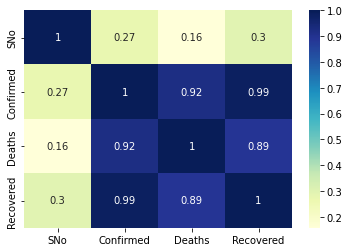

In [ ]:
dataplot = sns.heatmap(india_data.corr(), cmap="YlGnBu", annot=True)

##Fb Prophet

In [ ]:
pip install fbprophet

In [ ]:
from fbprophet import Prophet

import logging
logging.getLogger().setLevel(logging.ERROR)

In [ ]:
transactions = india_data[['ObservationDate', 'Deaths']]
transactions.rename(columns = {'ObservationDate' : 'ds', 'Deaths' : 'y'}, inplace = True)

In [ ]:
transactions.head()

,ds,y
39260,2020-06-10,0.0
39261,2020-06-10,77.0
39277,2020-06-10,0.0
39278,2020-06-10,4.0
39300,2020-06-10,32.0


In [ ]:
transactions.tail()

,ds,y
89819,2020-08-17,8.0
89862,2020-08-17,353.0
89896,2020-08-17,114.0
89900,2020-08-17,863.0
89910,2020-08-17,887.0


In [ ]:
model = Prophet()
model.fit(transactions)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)
future.head()

,ds
0,2020-06-10
1,2020-06-11
2,2020-06-12
3,2020-06-13
4,2020-06-14


In [ ]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-10,195.833102,-2680.610101,2833.030712,195.833102,195.833102,0.349195,0.349195,0.349195,0.349195,0.349195,0.349195,0.0,0.0,0.0,196.182297
1,2020-06-11,210.586725,-2572.548679,2886.674116,210.586725,210.586725,1.559535,1.559535,1.559535,1.559535,1.559535,1.559535,0.0,0.0,0.0,212.146260
2,2020-06-12,225.340348,-2544.805904,2941.003760,225.340348,225.340348,1.210953,1.210953,1.210953,1.210953,1.210953,1.210953,0.0,0.0,0.0,226.551301
3,2020-06-13,240.093969,-2604.788265,3056.474373,240.093969,240.093969,1.630160,1.630160,1.630160,1.630160,1.630160,1.630160,0.0,0.0,0.0,241.724129
4,2020-06-14,254.847591,-2295.571180,2900.135582,254.847591,254.847591,1.966041,1.966041,1.966041,1.966041,1.966041,1.966041,0.0,0.0,0.0,256.813632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2021-08-13,8007.783622,5449.300402,10657.489778,7381.650818,8660.065855,1.210953,1.210953,1.210953,1.210953,1.210953,1.210953,0.0,0.0,0.0,8008.994575
430,2021-08-14,8026.293921,5303.629130,10900.636636,7397.953300,8679.260455,1.630160,1.630160,1.630160,1.630160,1.630160,1.630160,0.0,0.0,0.0,8027.924081
431,2021-08-15,8044.804220,5190.313164,10840.105139,7413.305789,8698.459537,1.966041,1.966041,1.966041,1.966041,1.966041,1.966041,0.0,0.0,0.0,8046.770261
432,2021-08-16,8063.314519,5518.183094,10800.381652,7429.231740,8717.654130,-0.931741,-0.931741,-0.931741,-0.931741,-0.931741,-0.931741,0.0,0.0,0.0,8062.382778


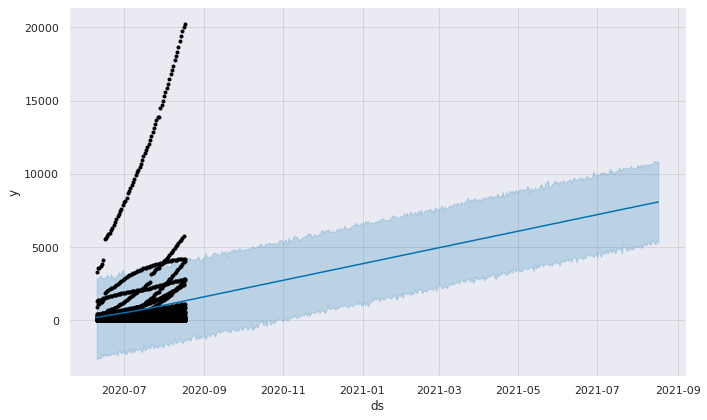

In [ ]:
fig1 = model.plot(forecast)

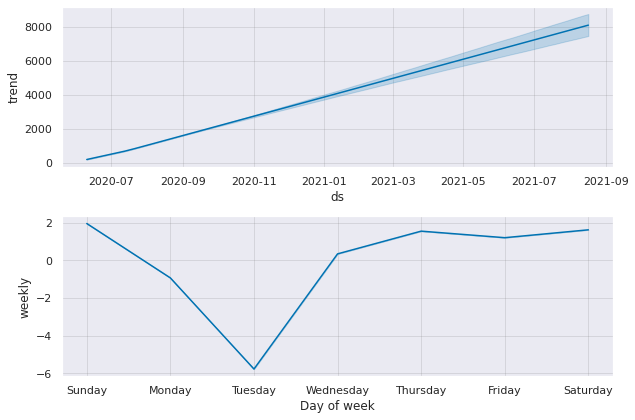

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(transactions.set_index('ds').y).reset_index()

In [ ]:
metric_df.dropna(inplace=True)

In [ ]:
fb_mse = mean_squared_error(metric_df.y, metric_df.yhat)
fb_rmse = np.sqrt(fb_mse)

In [ ]:
fb_mse

4376692.105339162

In [ ]:
fb_rmse

2092.0545177741333